<img src="https://raw.githubusercontent.com/OpenMRBenelux/openmrbenelux.github.io/afba2aa7c94cd7ad0f2757aca0efc18d8ee3154d/assets/ext_images/logo/openmr_benelux_2021_logo_regopen.svg">

# Python Visualisation Tutorial

Hello there, and welcome to our visualisation workshop!

This tutorial is entirely dedicated to offer useful tools to get started with visualisations in Python, with examples on neuro-imaging data. 

The data that we will explore today is part of an [open source repository](https://openneuro.org/datasets/ds003542) on adult language learners. We express our sincere gratitude to Kshipra Gurunandan, Manuel Carreiras and Pedro M. Paz-Alonso for making this data open source. Below, we will first print the README file that contains the explanation about the objective of this study.

In [28]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [29]:
import os

data_folder = "../inputs/ds003542"

# Description of the project
with open(os.path.join(data_folder, "README")) as txt_file:
    README_sections = txt_file.read().split(f'{"-"*34}')
    project_description = README_sections[0]
    references = README_sections[1]
    contact = README_sections[3]

<IPython.core.display.Javascript object>

In [30]:
print(project_description)

Study design:

34 adult language learners aged 20-70 were recruited from a language school. Subjects were at either intermediate or advanced levels of learning the same second language. Subjects performed semantic comprehension (reading and speech) and verbal production tasks in the MRI scanner in their native and new languages.




<IPython.core.display.Javascript object>

***

## Wait, what ...? A Jupyter notebook?

Never worked with jupyter notebooks before? Don't worry! We'll guide you through it step by step.

A **jupyter notebook** 
- is a convenient way to combine code with neat documentation, allowing others to easily follow a project that uses code
- works with so-called "blocks", which can either be a "code block" or a "markdown block"
    - *Markdown block*: You are reading one right now! It is a block that understands the markdown language, an easy language to create text, similar to HTML and LaTeX.
    - *Code block*: A code block in a jupyter notebook understands the Python language by default. If applicable, output is printed below the code block, such as images and text. You can also change the kernel of code blocks; in this way you can use other programming languages in the code blocks! Read more about this [here](https://jupyter4edu.github.io/jupyter-edu-book/jupyter.html).
- Allows to "hide" blocks, which will be visible with 3 dots (...). Solutions are hidden this way, but first try to find the solution yourself in the empty block above!
- has some nice shortcuts:

|Operation|Shortcut|
|---|---|
|Run a cell|shift-enter|
|Add cell above | "a" (first click left of the cell)|
|Add cell below | "b" (first click left of the cell)|
|Copy cell: | "c" (first click left of the cell)|
|Cut cell: | "x" (first click left of the cell)|
|Paste cell | "v" (first click left of the cell)|
|Delete cell | "dd" (first click left of the cell)|

Last note: If you want to install additional python packages, you can call upon the terminal with an exclamation mark (!) before a command. So, installing a new package will be the following structure inside a code cell: `!pip install my-package`

***

## Let's get started!
### Table of contents
0. Preparations
1. Visualising neuro-imaging data
    - What is a nifti (.nii)?
    - Anatomical MRI - T1w
    - Functional MRI (fMRI)
2. Visualisation on a dataframe
3. Use a function to manipulate your figure

***

# 0. Preparations

Set matplotlib inline to view images below the cell in this notebook

In [31]:
%matplotlib inline

<IPython.core.display.Javascript object>

Import packages necessary for the tutorial

In [32]:
# Data handling
import pandas as pd
import numpy as np

# Data description
import json

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Neuro-imaging packages
import nibabel as nib
import nilearn as nil

# Self-made functions
from python.functions import show_anatomical_slice, show_functional_slice, track_voxel

<IPython.core.display.Javascript object>

***

# 1. Visualising neuro-imaging data

The data was downloaded from OpenNeuro, [project ds003542](https://openneuro.org/datasets/ds003542/versions/1.0.0), which originates from a study on language learners. We only extracted data from subject 1. Hence, the data is present in the "ds00352-download" folder, subdirectory "sub-01":
- Anatomical MRI: "anat" subfolder
- Functional MRI: "func" subfolder

Let's define the paths:

In [40]:
t1w_path = os.path.join(data_folder, "sub-01/anat/sub-01_T1w.nii.gz")
bold_path = os.path.join(
    data_folder, "sub-01/func/sub-01_task-compL1_run-1_bold.nii.gz"
)

<IPython.core.display.Javascript object>

## 1.1 What is a nifti (.nii)?

For a thorough explanation on the origin and objective of nifti, we refer to [this webpage](https://nifti.nimh.nih.gov/). In short however, the nifti file format has been proposed to 

## 1.2 Anatomical MRI - T1w

Click [here](https://nipy.org/nibabel/coordinate_systems.html) for the source article in nibabel.\
Note that this anatomical T1w nifti is a 3D image, with each dimension being a spatial dimension (x, y and z), corresponding to a body axis (medio-lateral, antero-posterior and cranio-caudal).

### 1.2.1 Let's first search for the nifti file in our directory! 

In [34]:
t1w_file = nib.load(t1w_path)  # Upload the nifti file with nibabel
t1w_image = (
    t1w_file.get_fdata()
)  # Get the 3D numpy array that contains grey values of the voxels

<IPython.core.display.Javascript object>

### 1.2.2 What are the dimensions of the numpy array?

In [35]:
t1w_shape = ...
print(f"Shape of the 3D numpy array: {...}")
print(f"- # Medio-lateral voxels: {...}")
print(f"- # Antero-posterior voxels: {...}")
print(f"- # Cranio-caudal voxels: {...}")

Shape of the 3D numpy array: Ellipsis
- # Medio-lateral voxels: Ellipsis
- # Antero-posterior voxels: Ellipsis
- # Cranio-caudal voxels: Ellipsis


<IPython.core.display.Javascript object>

Solution:

In [36]:
t1w_shape = t1w_image.shape
print(f"Shape of the 3D numpy array: {t1_shape}")
print(f"- # Medio-lateral voxels: {t1_shape[0]}")
print(f"- # Antero-posterior voxels: {t1_shape[1]}")
print(f"- # Cranio-caudal voxels: {t1_shape[2]}")

Shape of the 3D numpy array: (176, 256, 256)
- # Medio-lateral voxels: 176
- # Antero-posterior voxels: 256
- # Cranio-caudal voxels: 256


<IPython.core.display.Javascript object>

### 1.2.3 Let's show a single slice of the 3D numpy array.
To do this, we can index the object, for which step 2 will help us!\
We want to extract axial slice 150. 

Hint: indexing of the `t1w_image` object will be as follows: `t1w_image[ML_direction, AP_direction, CC_direction]`, with each element consisting of either a single value, or a range (e.g. `5:9`). To select everyting along an axis, just pass `:`. ML = Medio-lateral, AP = Antero-posterior, CC = Cranio-caudal.

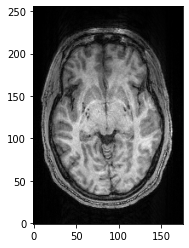

<IPython.core.display.Javascript object>

In [37]:
t1w_slice = t1w_image[:, :, 150]
fig, ax = plt.subplots()
ax.imshow(t1w_slice.T, cmap="gray", origin="lower")

Solution:

- All voxels in the Medio-lateral direction must be selected, so `:` in the fist position
- All voxels in the Antero-posterior direction must be selected, so `:` in the second position
- Only voxel number 150 must be selected in Cranio-caudal direction, so `150` in the second position

Hence, we will index the image as follows: `[:,:,150]`

We have also created a function (`show_anatomical_slice`) for you to easily investigate your T1w image. You can consult the source code in the `functions.py` file. 

To use it, just run `show_anatomical_slice(image = t1w_image, orientation = 'axial', slice_nr = 150)` in the next cell. Play around with the `orientation` and `slice_nr` parameters at will!

**REMARK: Defacing**\
Run the following code block in a new cell: `show_anatomical_slice(t1_image, 'sagittal', 100)`.\
In this slice, you can nicely see that this nifti image has been "defaced", to ensure anonimity. This essentially means that, inside the 3D numpy array, all values that relate to the face were set to 0 (black)!

## 1.3 Functional MRI (fMRI)

First things first: a functional MRI image has a fourth dimension, time!\
Hence, a nifti file is a 4D numpy array, with the first 3 dimensions being spatial (x: medio-lateral, y: antero-posterior and z: craniocaudal), and the 4th being time!

EXTRA: For the most fancy experience, you can replace the `color_map` parameter inside the `show_functional_slice` and `track_voxel` functions with one of the options listed in [this link](https://matplotlib.org/stable/tutorials/colors/colormaps.html). This will change the colors of your image, check it out! :) 

### 1.3.1 Let's first search for the nifti file in our directory! 

In [41]:
bold_file = nib.load(bold_path)  # Upload the nifti file with nibabel
bold_image = (
    bold_file.get_fdata()
)  # Get the 3D numpy array that contains grey values of the voxels

<IPython.core.display.Javascript object>

### 1.3.2 What are the dimensions of the numpy array?

In [42]:
bold_shape = ...
print(f"Shape of the 3D numpy array: {...}")
print(f"- # Medio-lateral voxels: {...}")
print(f"- # Antero-posterior voxels: {...}")
print(f"- # Cranio-caudal voxels: {...}")
print(f"- # Timepoints: {...}")

Shape of the 3D numpy array: Ellipsis
- # Medio-lateral voxels: Ellipsis
- # Antero-posterior voxels: Ellipsis
- # Cranio-caudal voxels: Ellipsis
- # Timepoints: Ellipsis


<IPython.core.display.Javascript object>

Solution:

In [43]:
bold_shape = bold_image.shape
print(f"Shape of the 3D numpy array: {bold_shape}")
print(f"- # Medio-lateral voxels: {bold_shape[0]}")
print(f"- # Antero-posterior voxels: {bold_shape[1]}")
print(f"- # Cranio-caudal voxels: {bold_shape[2]}")
print(f"- # Timepoints: {bold_shape[3]}")

Shape of the 3D numpy array: (64, 64, 32, 186)
- # Medio-lateral voxels: 64
- # Antero-posterior voxels: 64
- # Cranio-caudal voxels: 32
- # Timepoints: 186


<IPython.core.display.Javascript object>

### 1.3.3 Let's show a single slice again!
You can use your answer to section 1.2.3 to answer this one. We want to visualize axial slice 10.

Solution:

- All voxels in the Medio-lateral direction must be selected, so `:` in the fist position
- All voxels in the Medio-lateral direction must be selected, so `:` in the second position
- Only voxel number 150 must be selected in Cranio-caudal direction, so `10` in the second position
- We consider the first timepoint, so the last dimension (time) should be indexed as `0`

Hence, we will index the image as follows: `[:,:,10,0]`

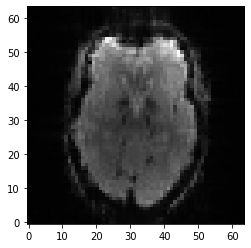

<IPython.core.display.Javascript object>

In [44]:
bold_slice = bold_image[:, :, 10, 0]
fig, ax = plt.subplots()
ax.imshow(bold_slice.T, cmap="gray", origin="lower")

Question: When looking at the spatial dimensions and compare it to the T1w image, what do you notice?

Answer:

We see that the resolution of the fMRI is far less than the T1w image! This is why we chose axial slice 20 instead of 150 (which was the case for T1w); slice 150 doesn't exist in this fMRI image!

We have also created a function (`show_functional_slice`) for you to easily investigate your fMRI image. You can consult the source code in the `functions.py` file. 

To use it, just run `show_functional_slice(image = bold_image, orientation = 'axial', slice_nr = 10, timepoint = 0)` in the next cell. Play around with the `orientation`, `slice_nr` and `timepoint` parameters at will!

### 1.3.4 Let's track a voxel over time!

In this step, we will explore how we track a single voxel over time. This will show how the BOLD value inside the voxel in a T2* image changes over the 4th dimension, time. We want to visualize the voxel with the following spatial characteristics:
- Medio-lateral position: 30
- Antero-posterior position: 53
- Cranio-caudal position 20

Hint: Use matplotlib (already loaded). The following functions might be useful: `fig,ax = plt.subplots()` and `ax.plot()`

Solution:

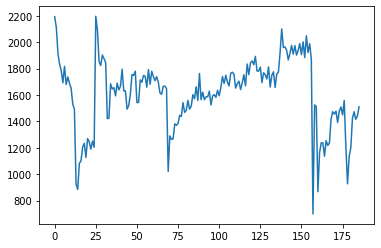

<IPython.core.display.Javascript object>

In [45]:
fig, ax = plt.subplots()
voxel_BOLD_vector = bold_image[30, 53, 20, :]
ax.plot(voxel_BOLD_vector)
plt.show()

Perhaps it might be nice to see the spatial location of the tracked voxel in 3 different planes of the MRI image. Run the following code block in a next cell reveal its location: `track_voxel(bold_image, 30, 53, 20, voxel_color='lightgreen')`.

***

# 2. Visualisation on a dataframe

We will first upload the following: 
- data: `participants.tsv`
- description of the data: `participants.json`

In [ ]:
# Data

table_path = os.path.join(data_folder, "participants.tsv")
df = pd.read_csv(table_path, sep="\t")

# Data description
with open(os.path.join(data_folder, "participants.json")) as json_file:
    df_description = json.load(json_file)
    df_description = pd.DataFrame(df_description)
    df_description = df_description.drop("TermURL", axis=0)

# 2.1 Explore the dataframes quantitatively

Get a sneak preview of the data `df.head()` and the full data description `df_description`

Get a quick insight in the distribution of the data. For this, you can use e.g. `df.describe()` and `df.info()`

## 2.2 Visualisation of disbributions

...

***

# Acknowledgement and Data source

## References for use of this data

In [ ]:
print(references)

## Contact information of owners of the datasets

In [ ]:
print(contact)